In [87]:
import numpy as np
from numpy.random import  randn
from pandas import Series, DataFrame
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline

### Agenda:
-  Resamping: binning
-  Period logic
-  Period index

#### create a date index with date_range method

In [2]:
rng = pd.date_range('2017-08-13', periods=100000, freq='t')
rng

DatetimeIndex(['2017-08-13 00:00:00', '2017-08-13 00:01:00',
               '2017-08-13 00:02:00', '2017-08-13 00:03:00',
               '2017-08-13 00:04:00', '2017-08-13 00:05:00',
               '2017-08-13 00:06:00', '2017-08-13 00:07:00',
               '2017-08-13 00:08:00', '2017-08-13 00:09:00',
               ...
               '2017-10-21 10:30:00', '2017-10-21 10:31:00',
               '2017-10-21 10:32:00', '2017-10-21 10:33:00',
               '2017-10-21 10:34:00', '2017-10-21 10:35:00',
               '2017-10-21 10:36:00', '2017-10-21 10:37:00',
               '2017-10-21 10:38:00', '2017-10-21 10:39:00'],
              dtype='datetime64[ns]', length=100000, freq='T')

In [3]:
ts = Series(randn(100000), index=rng)

In [48]:
#select our data points by every 30 minites
ts[pd.date_range(ts.index[0],ts.index[-1],freq='30t')].head()

2017-08-13 00:00:00   -0.461207
2017-08-13 00:30:00   -0.645464
2017-08-13 01:00:00   -0.016146
2017-08-13 01:30:00    0.729625
2017-08-13 02:00:00   -0.045817
Freq: 30T, dtype: float64

## Resamping: binning

In [30]:
# default by left closed
ts.resample('30t', how='count',closed='left').head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


2017-08-13 00:00:00    30
2017-08-13 00:30:00    30
2017-08-13 01:00:00    30
2017-08-13 01:30:00    30
2017-08-13 02:00:00    30
Freq: 30T, dtype: int64

In [33]:
ts.resample('30t',closed= 'left').count().head()

2017-08-13 00:00:00    30
2017-08-13 00:30:00    30
2017-08-13 01:00:00    30
2017-08-13 01:30:00    30
2017-08-13 02:00:00    30
Freq: 30T, dtype: int64

In [34]:
# use the right of each sampling as the label(index)
ts.resample('30t',how = 'count',closed='left',label='right').head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


2017-08-13 00:30:00    30
2017-08-13 01:00:00    30
2017-08-13 01:30:00    30
2017-08-13 02:00:00    30
2017-08-13 02:30:00    30
Freq: 30T, dtype: int64

In [7]:
from datetime import timedelta

In [35]:
#set the label 1 second behind
resampled = ts.resample('30t', how='count',
                        loffset=timedelta(seconds=-1),
                        closed='left', label='right')
resampled.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


2017-08-13 00:29:59    30
2017-08-13 00:59:59    30
2017-08-13 01:29:59    30
2017-08-13 01:59:59    30
2017-08-13 02:29:59    30
Freq: 30T, dtype: int64

In [37]:
#resampled by day
resampled = ts.resample('D',how= 'count',closed = 'left',label='left')
resampled.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


2017-08-13    1440
2017-08-14    1440
2017-08-15    1440
2017-08-16    1440
2017-08-17    1440
Freq: D, dtype: int64

In [38]:
ts.resample('30t',how ='mean',closed='left').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


0.0013114007185329687

In [11]:
ts.resample('M',how = ['first','last','mean','min','max','count'],closed= 'left')

## Price Variation from Pandas groupby 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


,first,last,mean,min,max,count
2017-08-31,-0.461207,-0.401563,-0.004504,-3.728604,3.958519,25920
2017-09-30,-1.404706,-0.468531,0.005459,-4.347805,3.959563,43200
2017-10-31,0.252236,0.180780,0.000388,-3.890116,3.877851,30880


In [39]:
ts.resample('M',closed='left').apply(['first','last','mean','min','max','count'])

,first,last,mean,min,max,count
2017-08-31,-0.461207,-0.401563,-0.004504,-3.728604,3.958519,25920
2017-09-30,-1.404706,-0.468531,0.005459,-4.347805,3.959563,43200
2017-10-31,0.252236,0.180780,0.000388,-3.890116,3.877851,30880


### Period logic

In [12]:
# a period begin with  2011 June, frequency is monthly
p = pd.Period('Jun-2011', freq='M')
p

Period('2011-06', 'M')

In [13]:
p+1

Period('2011-07', 'M')

In [14]:
p.start_time

Timestamp('2011-06-01 00:00:00')

In [15]:
# a period begin with 2010 July and end with 2011 June, incrment annuly

p = pd.Period('2011', freq='A-JUN') # annuly data end wtih June
p

Period('2011', 'A-JUN')

In [16]:
p+1

Period('2012', 'A-JUN')

In [17]:
p+2

Period('2013', 'A-JUN')

In [18]:
p.start_time

Timestamp('2010-07-01 00:00:00')

In [19]:
p.end_time

Timestamp('2011-06-30 23:59:59.999999999')

In [20]:
# convert the perion into monthly
p.asfreq('M',how= 'end')

Period('2011-06', 'M')

In [21]:
p.asfreq('M',how= 'start')

Period('2010-07', 'M')

In [24]:
p.asfreq('M',how= 'start')+1

Period('2010-08', 'M')

In [28]:
(p.asfreq('M',how= 'start')).asfreq('B',how ='end' )

Period('2010-07-30', 'B')

### Period index

In [42]:
ts.resample('M',closed = 'left').index[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


Timestamp('2017-08-31 00:00:00', freq='M')

In [43]:
rts = ts.resample('M',closed = 'left',kind= 'period')

In [47]:
rts

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=left, label=right, convention=start, base=0]

#### creat period index with period_range

In [50]:
pd.period_range('2017-08',periods= 6,freq='M')

PeriodIndex(['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01'], dtype='period[M]', freq='M')

### Real example

In [59]:
mdata = pd.read_csv('data/macrodata.csv')

In [60]:
print(mts.shape)
mdata.head()

(203, 14)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [65]:
mdata.loc[0,:]

year        1959.000
quarter        1.000
realgdp     2710.349
realcons    1707.400
realinv      286.898
realgovt     470.045
realdpi     1886.900
cpi           28.980
m1           139.700
tbilrate       2.820
unemp          5.800
pop          177.146
infl           0.000
realint        0.000
Name: 0, dtype: float64

In [63]:
# create a periodindex from the data
index = pd.PeriodIndex(year = mdata.year,quarter = mdata.quarter,freq= 'Q-DEC')

In [64]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [66]:
mdata.index = index

In [67]:
mdata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


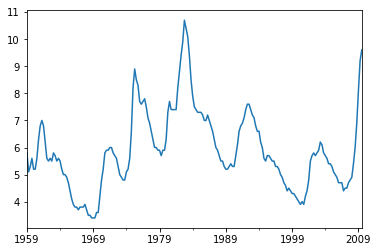

In [70]:
mdata.unemp.plot()

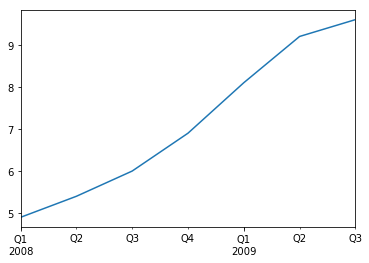

In [75]:
mdata.unemp['2008':].plot()

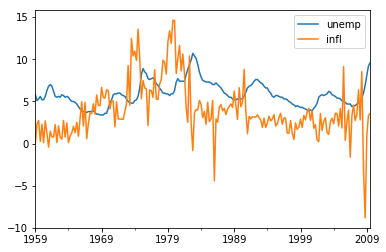

In [77]:
mdata.loc[:,['unemp','infl']].plot()

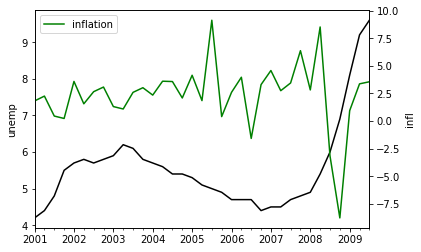

In [92]:
# fig = plt.figure();
# ax1 = fig.add_subplot()
ax1 = mdata.loc['2001': ,'unemp'].plot(style = 'k',label= 'unemployment')
# ax2 = fig.add_subplot()
ax2 = mdata.loc['2001': ,'infl'].plot(secondary_y = True,style = 'g',label = 'inflation')
ax1.set_ylabel('unemp')
ax2.set_ylabel('infl')
plt.legend()

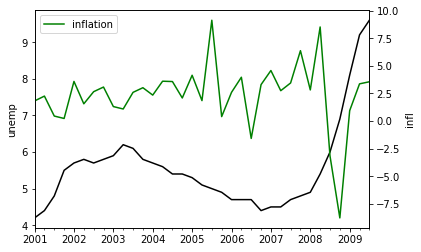

In [101]:
fig = plt.figure();
ax1= fig.add_subplot(111);
ax1 = mdata.loc['2001': ,'unemp'].plot(style = 'k',label= 'unemployment')
ax2 = fig.add_subplot(111);
ax2 = mdata.loc['2001': ,'infl'].plot(secondary_y = True,style = 'g',label = 'inflation')
ax1.set_ylabel('unemp')
ax2.set_ylabel('infl')
plt.legend()

### time series analysis by groupby

In [22]:
import pandas_datareader.data as web

In [23]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,NaN
2009-03-17,159.93,167.50,159.39,167.50,NaN
2009-03-18,167.24,169.83,163.86,166.38,NaN
2009-03-19,165.67,167.83,163.53,164.81,NaN
2009-03-20,164.98,166.33,163.01,164.91,NaN


<h3 align='Left'> Calculate Daily Price Variation </h3>
<br> Daily price variation of a stock is the difference between the highest and lowest values on a given trading day. 